In [100]:
import imageio.v3 as iio
import os
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
from receptive_fields.util.activation_visualization import multiplot
from receptive_fields.util.image import fit_gabor_filter
import torch

In [2]:
path = "../resources/example_rfs"

In [75]:
imgs = []
files = os.listdir(path)
files = np.sort(files)
for file in files:
    imgs.append(iio.imread(os.path.join(path, file)))

stds = [np.std(img) for img in imgs]
means = [np.mean(img) for img in imgs]

In [112]:
gabor_fit = [fit_gabor_filter(img.swapaxes(0,2)[0])[1] for img in imgs]

In [44]:
tsne_img = [img.flatten() for img in imgs[64:96]]
embed = TSNE(n_components=2).fit_transform(imgs)

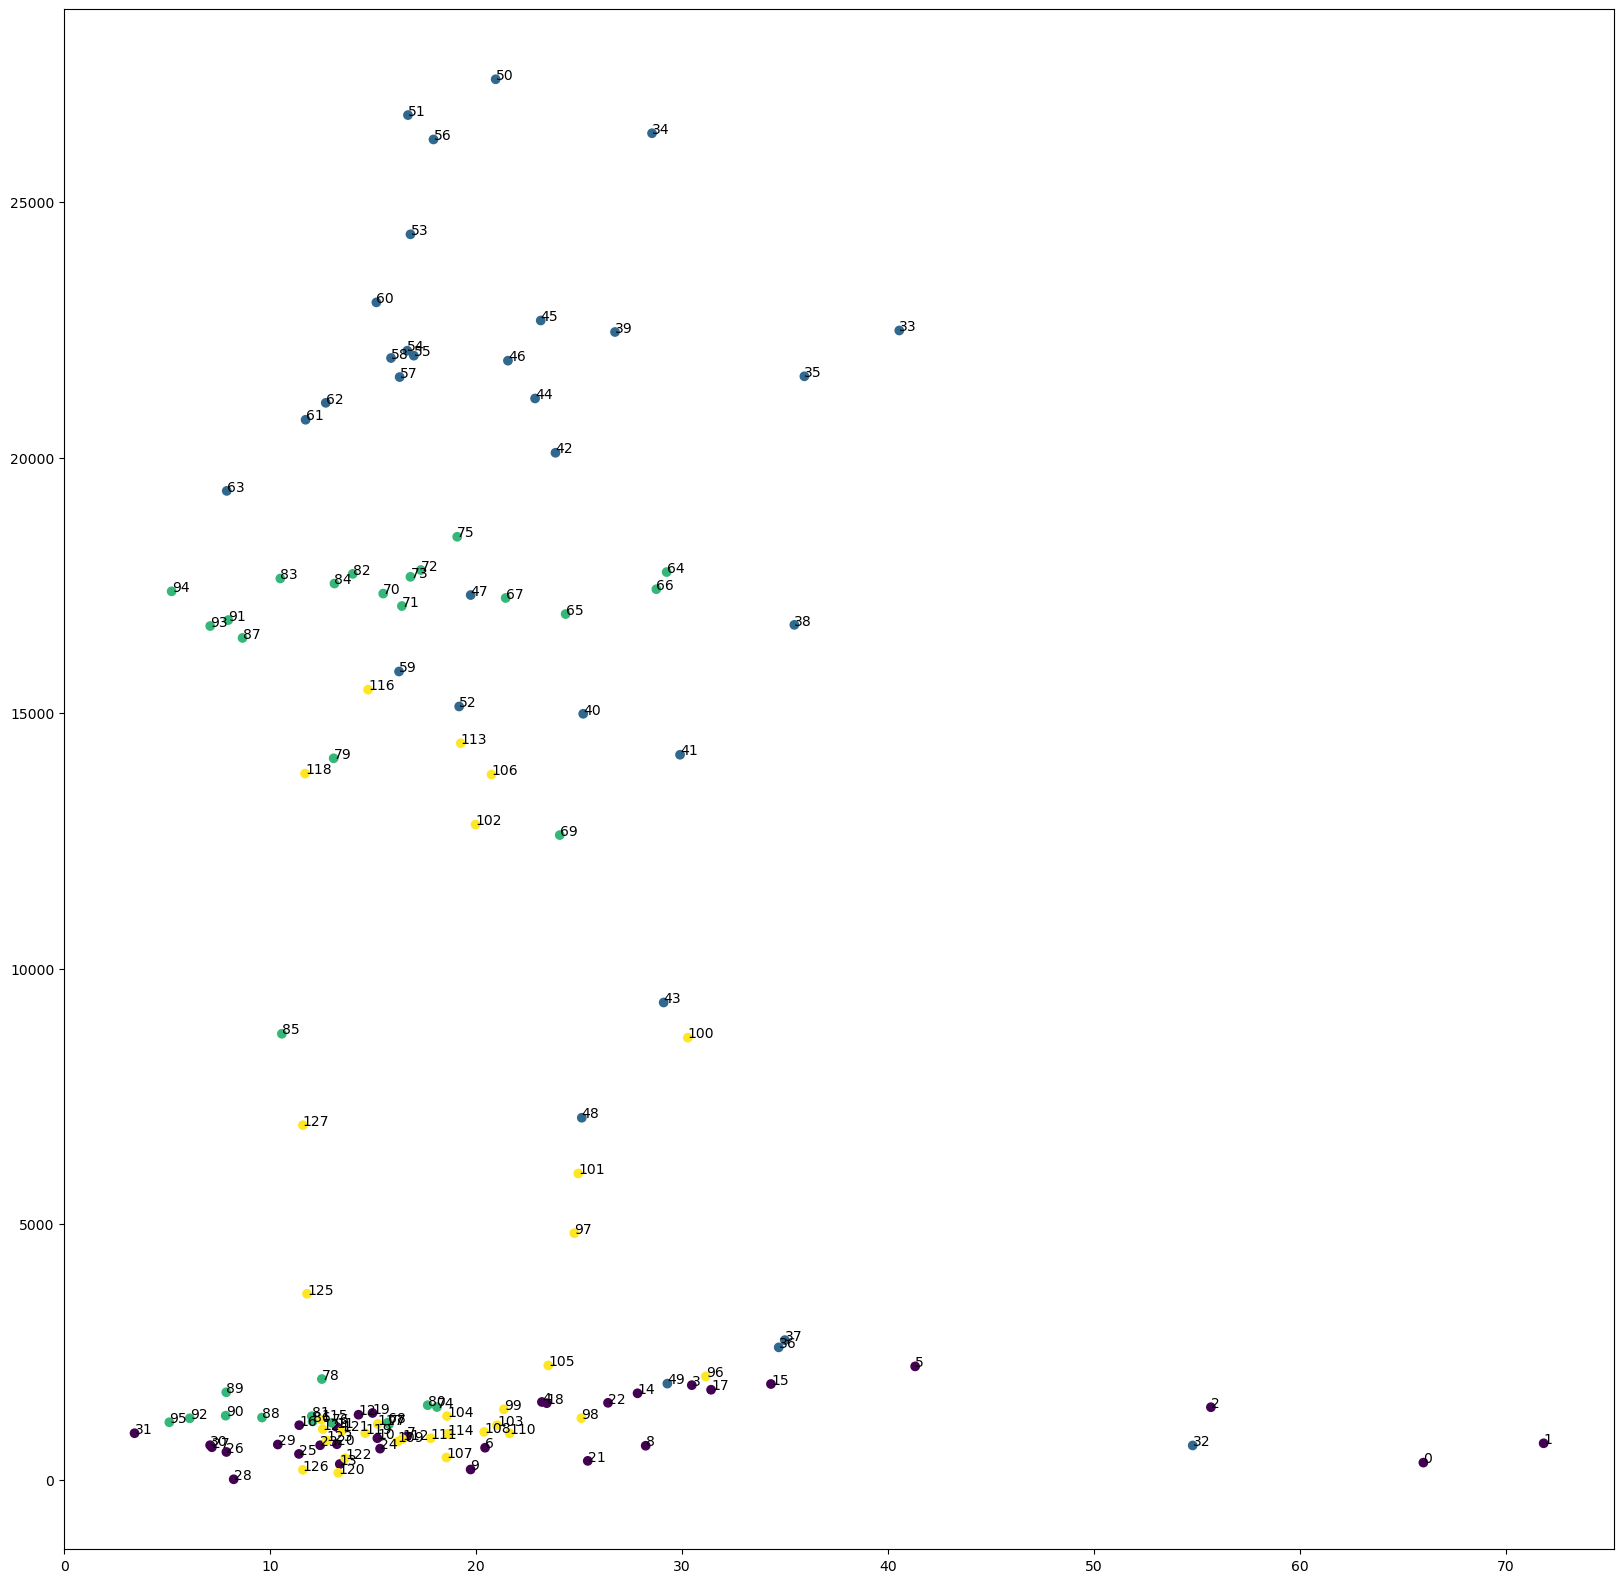

In [113]:
plt.figure(figsize=(20,20))
x = stds
y = gabor_fit
indices = [i for i in range(len(x))]
c = np.array(indices) // 32
plt.scatter(x,y, c=c)
for i, txt in enumerate(indices):
    plt.annotate(txt, (x[i],y[i]))

In [99]:
torch.from_numpy(np.array(imgs[32])).min()

tensor(0, dtype=torch.uint8)

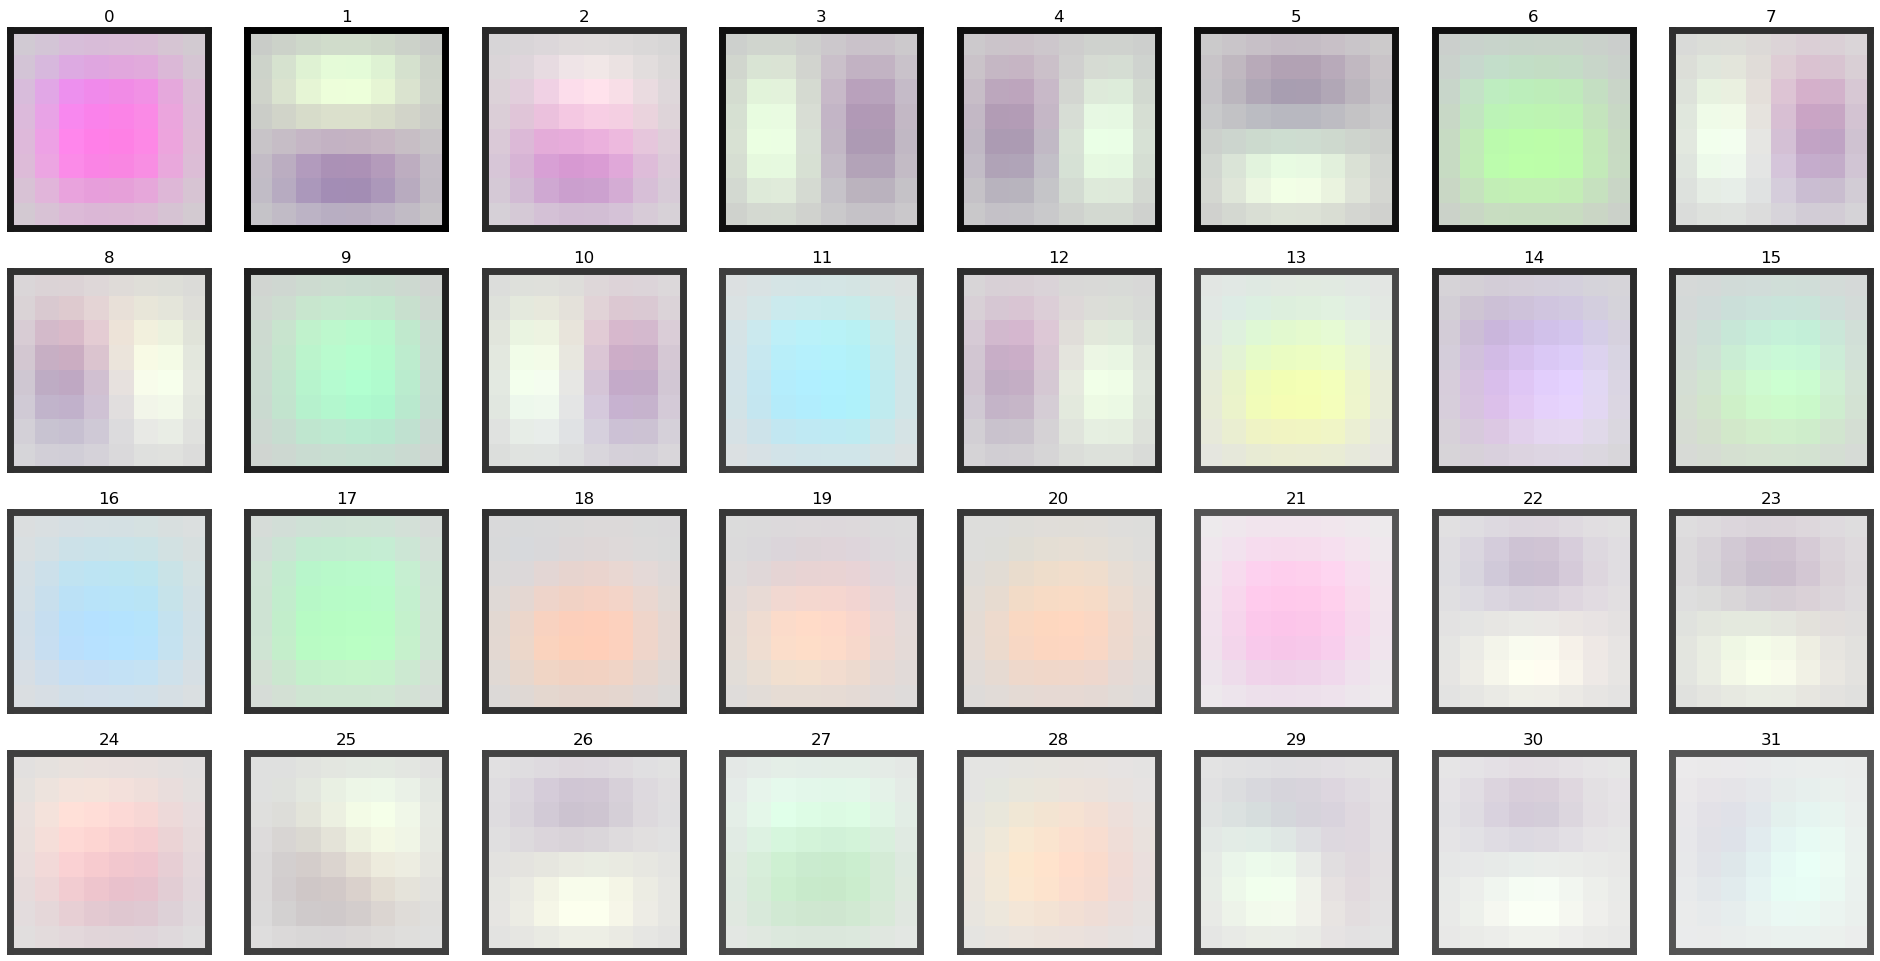

In [93]:
multiplot(eff_rfs=torch.from_numpy(np.array(imgs[32:64])).float().movedim(-1,-3)/255)